<a href="https://colab.research.google.com/github/tariqshaban/covid-19-vaccination/blob/master/COVID%2019%20Vaccination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [1]:
# Enabling colored terminal text for warnings
!pip install colorama

import plotly.graph_objects as go
import numpy as np
import pandas as pd
import statsmodels.stats.weightstats as ws
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import clear_output
from datetime import datetime, timedelta
from scipy import stats
from colorama import Fore, Back, Style
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

clear_output()
print(Fore.GREEN + u'\u2713 ' + 'Successfully downloaded dependencies.')    
print(Style.RESET_ALL)

✓ Successfully downloaded dependencies.



# Reading Dataset

In [2]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])

# Explore dataframe dimensionality
print('No. of columns ' + str(len(df.columns)))
print('No. of rows ' + str(len(df.index)))

# Explore columns
print('\nColumns')
print('-----------------------------------------------------------------------')
print(*df.columns, sep='\n')

No. of columns 67
No. of rows 193017

Columns
-----------------------------------------------------------------------
iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
reproduction_rate
icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
positive_rate
tests_per_case
tests_units
total_vaccinations
people_vaccinated
people_fully_vaccinated
total_boosters
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
total_boosters_per_

# Preprocessing

In [3]:
# Remove unnecessary columns
df = df[[
    'iso_code', 'continent', 'location', 'date',
    'population', 'population_density', 'median_age', 'extreme_poverty', 'diabetes_prevalence',
    'total_cases', 'new_cases', 'total_cases_per_million', 'new_cases_per_million',
    'total_deaths', 'new_deaths', 'total_deaths_per_million', 'new_deaths_per_million',
    'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million',
    'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million',
    'total_tests', 'total_tests_per_thousand', 'new_tests', 'new_tests_per_thousand',
    'people_vaccinated', 'people_vaccinated_per_hundred',
    'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
    'total_boosters', 'total_boosters_per_hundred'

    ,'new_vaccinations', 'new_people_vaccinated_smoothed'
]]

# Find columns nulls percentage
print('Null percentage in each column before vaccination distribution')
print('-----------------------------------------------------------------------')
print(df.isnull().sum() / df.shape[0] * 100.00)

Null percentage in each column before vaccination distribution
-----------------------------------------------------------------------
iso_code                                0.000000
continent                               5.811405
location                                0.000000
date                                    0.000000
population                              0.607200
population_density                     10.893859
median_age                             17.413492
extreme_poverty                        46.377780
diabetes_prevalence                    13.573416
total_cases                             3.927115
new_cases                               4.038504
total_cases_per_million                 4.370081
new_cases_per_million                   4.481471
total_deaths                           13.516426
new_deaths                             13.515390
total_deaths_per_million               13.952657
new_deaths_per_million                 13.951621
icu_patients                    

In [4]:
# Worldwide statistics is concerned rather than a specific stratum
df_world = df[df['location'] == 'World']

# Date when vaccination was first administered
df_vaccine_world = df_world[df_world['date'] >= '2020-12-02'].copy()

# Find columns nulls percentage
print('\nNull percentage in each column after vaccination distribution')
print('-----------------------------------------------------------------------')
print(df_vaccine_world.isnull().sum() / df_vaccine_world.shape[0] * 100.00)


Null percentage in each column after vaccination distribution
-----------------------------------------------------------------------
iso_code                                 0.000000
continent                              100.000000
location                                 0.000000
date                                     0.000000
population                               0.000000
population_density                       0.000000
median_age                               0.000000
extreme_poverty                          0.000000
diabetes_prevalence                      0.000000
total_cases                              0.000000
new_cases                                0.000000
total_cases_per_million                  0.000000
new_cases_per_million                    0.000000
total_deaths                             0.000000
new_deaths                               0.000000
total_deaths_per_million                 0.000000
new_deaths_per_million                   0.000000
icu_patients   

In [5]:
# Remove columns that have a high percentage of nulls
df_vaccine_world.drop([
    'continent',
    'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million',
    'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million',
    'total_tests', 'total_tests_per_thousand', 'new_tests', 'new_tests_per_thousand'
], axis=1, inplace=True)

# Find columns nulls percentage
print('\nNull percentage in each column after removing unnecessary columns')
print('-----------------------------------------------------------------------')
print(df_vaccine_world.isnull().sum() / df_vaccine_world.shape[0] * 100.00)


Null percentage in each column after removing unnecessary columns
-----------------------------------------------------------------------
iso_code                               0.000000
location                               0.000000
date                                   0.000000
population                             0.000000
population_density                     0.000000
median_age                             0.000000
extreme_poverty                        0.000000
diabetes_prevalence                    0.000000
total_cases                            0.000000
new_cases                              0.000000
total_cases_per_million                0.000000
new_cases_per_million                  0.000000
total_deaths                           0.000000
new_deaths                             0.000000
total_deaths_per_million               0.000000
new_deaths_per_million                 0.000000
people_vaccinated                      0.000000
people_vaccinated_per_hundred          0.0000

In [6]:
# Remove columns that has values that did not fluctuate
df_vaccine_world.drop([
    'population_density', 
    'median_age', 'extreme_poverty', 'diabetes_prevalence',
], axis=1, inplace=True)

# Find columns nulls percentage
print('\nNull percentage in each column after removing non-changing values')
print('-----------------------------------------------------------------------')
print(df_vaccine_world.isnull().sum() / df_vaccine_world.shape[0] * 100.00)


Null percentage in each column after removing non-changing values
-----------------------------------------------------------------------
iso_code                               0.000000
location                               0.000000
date                                   0.000000
population                             0.000000
total_cases                            0.000000
new_cases                              0.000000
total_cases_per_million                0.000000
new_cases_per_million                  0.000000
total_deaths                           0.000000
new_deaths                             0.000000
total_deaths_per_million               0.000000
new_deaths_per_million                 0.000000
people_vaccinated                      0.000000
people_vaccinated_per_hundred          0.000000
people_fully_vaccinated                1.978417
people_fully_vaccinated_per_hundred    1.978417
total_boosters                         4.856115
total_boosters_per_hundred             4.8561

In [7]:
# Vaccination dataframe dimensionality
print('No. of columns ' + str(len(df_vaccine_world.columns)))
print('No. of rows ' + str(len(df_vaccine_world.index)))

No. of columns 20
No. of rows 556


# Visualizations

In [8]:
plt.rcParams['figure.figsize'] = (10, 6)

### Daily New Cases

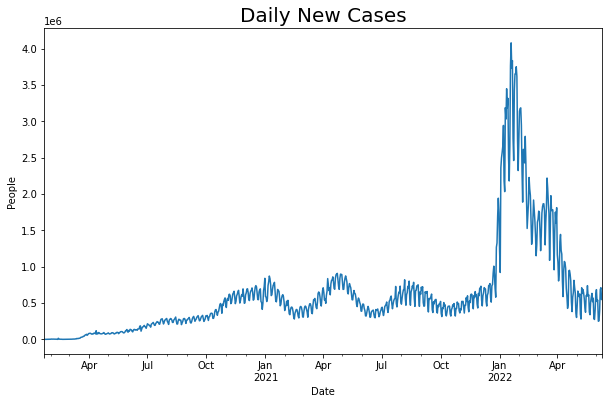

In [9]:
df_plot = df_world[['date', 'new_cases']]
df_plot.set_index('date', inplace=True)
df_plot.plot(kind='line', legend=None)

plt.xlabel('Date')
plt.ylabel('People')
plt.title('Daily New Cases', fontsize=20)

plt.show()

### Daily New Deaths

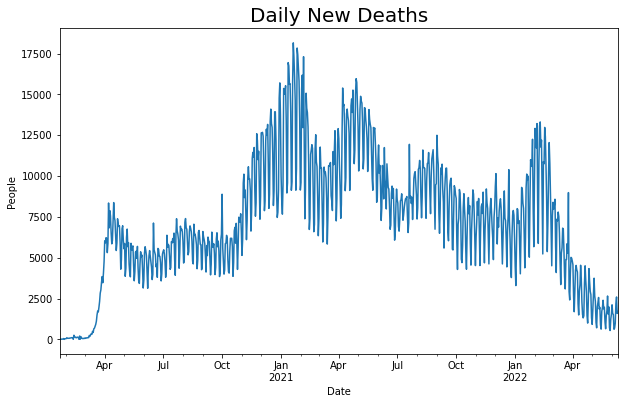

In [10]:
df_plot = df_world[['date', 'new_deaths']]
df_plot.set_index('date', inplace=True)
df_plot.plot(kind='line', legend=None)

plt.xlabel('Date')
plt.ylabel('People')
plt.title('Daily New Deaths', fontsize=20)

plt.show()

### Cumulative Vaccination

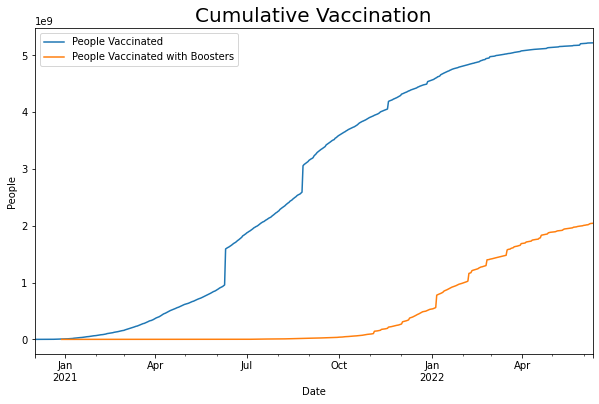

In [11]:
df_plot = df_vaccine_world[['date', 'people_vaccinated', 'total_boosters']]
df_plot.set_index('date', inplace=True)
df_plot.plot(kind='line')

plt.legend(['People Vaccinated', 'People Vaccinated with Boosters'])
plt.xlabel('Date')
plt.ylabel('People')
plt.title('Cumulative Vaccination', fontsize=20)

plt.show()

### Total Cases

In [12]:
yesterday = (datetime.today()- timedelta(days=1)).strftime('%Y-%m-%d')
df_yesterday = df[df['date']==yesterday]
df_yesterday = df_yesterday[df_yesterday['iso_code'].notna() & df_yesterday['continent'].notna()]


fig = go.Figure(data=go.Choropleth(
    locations = df_yesterday['iso_code'],
    z = df_yesterday['total_cases'],
    text = df_yesterday['location'],
    colorscale='Reds',
))

fig.update_layout(
    title=f'Total Cases',
    margin=dict(t=40, b=5, l=0, r=0),
    width=599,
    height=404
)

fig.show()

### Total Deaths

In [13]:
yesterday = (datetime.today()- timedelta(days=1)).strftime('%Y-%m-%d')
df_yesterday = df[df['date']==yesterday]
df_yesterday = df_yesterday[df_yesterday['iso_code'].notna() & df_yesterday['continent'].notna()]


fig = go.Figure(data=go.Choropleth(
    locations = df_yesterday['iso_code'],
    z = df_yesterday['total_deaths'],
    text = df_yesterday['location'],
    colorscale='Reds',
))

fig.update_layout(
    title=f'Total Deaths',
    autosize=True,
    margin=dict(t=40, b=5, l=0, r=0),
    width=599,
    height=404
)

fig.show()

### New Cases Yesterday

In [14]:
yesterday = (datetime.today()- timedelta(days=1)).strftime('%Y-%m-%d')
df_yesterday = df[df['date']==yesterday]
df_yesterday = df_yesterday[df_yesterday['iso_code'].notna() & df_yesterday['continent'].notna()]


fig = go.Figure(data=go.Choropleth(
    locations = df_yesterday['iso_code'],
    z = df_yesterday['new_cases'],
    text = df_yesterday['location'],
    colorscale='Reds',
))

fig.update_layout(
    title=f'New Cases in {yesterday}',
    autosize=True,
    margin=dict(t=40, b=5, l=0, r=0),
    width=599,
    height=404
)

fig.show()

### New Deaths Yesterday

In [15]:
yesterday = (datetime.today()- timedelta(days=1)).strftime('%Y-%m-%d')
df_yesterday = df[df['date']==yesterday]
df_yesterday = df_yesterday[df_yesterday['iso_code'].notna() & df_yesterday['continent'].notna()]


fig = go.Figure(data=go.Choropleth(
    locations = df_yesterday['iso_code'],
    z = df_yesterday['new_deaths'],
    text = df_yesterday['location'],
    colorscale='Reds',
))

fig.update_layout(
    title=f'New Deaths in {yesterday}',
    autosize=True,
    margin=dict(t=40, b=5, l=0, r=0),
    width=599,
    height=404
)

fig.show()

### Infection Probability

In [16]:
yesterday = (datetime.today()- timedelta(days=1)).strftime('%Y-%m-%d')
df_yesterday = df[df['date']==yesterday]
df_yesterday = df_yesterday[df_yesterday['iso_code'].notna() & df_yesterday['continent'].notna()]


fig = go.Figure(data=go.Choropleth(
    locations = df_yesterday['iso_code'],
    z = df_yesterday['total_cases'] / df_yesterday['population'] * 100,
    text = df_yesterday['location'],
    colorscale='Reds',
))

fig.update_layout(
    title='Infection Probability (per Hundred)',
    autosize=True,
    margin=dict(t=40, b=5, l=0, r=0),
    width=599,
    height=404
)

fig.show()

### Death Probability

In [17]:
yesterday = (datetime.today()- timedelta(days=1)).strftime('%Y-%m-%d')
df_yesterday = df[df['date']==yesterday]
df_yesterday = df_yesterday[df_yesterday['iso_code'].notna() & df_yesterday['continent'].notna()]


fig = go.Figure(data=go.Choropleth(
    locations = df_yesterday['iso_code'],
    z = df_yesterday['total_deaths'] / df_yesterday['population'] * 100,
    text = df_yesterday['location'],
    colorscale='Reds',
))

fig.update_layout(
    title='Death Probability (per Hundred)',
    autosize=True,
    margin=dict(t=40, b=5, l=0, r=0),
    width=599,
    height=404
)

fig.show()

### Average Vaccinaions per Hundred During April and May

In [18]:
df_may = df[(df['date']>='2022-04-01') & (df['date']<='2022-05-31')]
df_may = df_may[df_may['iso_code'].notna() & df_may['continent'].notna()]


fig = go.Figure(data=go.Choropleth(
    locations = df_may['iso_code'],
    z = df_may['people_vaccinated_per_hundred'],
    text = df_may['location'],
    colorscale='Greens',
))

fig.update_layout(
    title='Average Vaccinaions per Hundred During April and May',
    autosize=True,
    margin=dict(t=40, b=5, l=0, r=0),
    width=599,
    height=404
)

fig.show()

### Average Fully Vaccinaions per Hundred During April and May

In [19]:
df_may = df[(df['date']>='2022-04-01') & (df['date']<='2022-05-31')]
df_may = df_may[df_may['iso_code'].notna() & df_may['continent'].notna()]


fig = go.Figure(data=go.Choropleth(
    locations = df_may['iso_code'],
    z = df_may['people_fully_vaccinated_per_hundred'],
    text = df_may['location'],
    colorscale='Greens',
))

fig.update_layout(
    title='Average Fully Vaccinaions per Hundred During April and May',
    autosize=True,
    margin=dict(t=40, b=5, l=0, r=0),
    width=599,
    height=404
)

fig.show()

### Compare death/cases ratio with fully vaccination

In [20]:
df_cases_with_vaccination = df_vaccine_world[['date', 'people_fully_vaccinated', 'new_cases', 'new_deaths']].copy()
df_cases_with_vaccination['death_ratio'] = df_cases_with_vaccination['new_deaths'] / df_cases_with_vaccination['new_cases'] * 100
df_cases_with_vaccination.dropna(how='any', inplace=True)

print(f'Total people vaccincated: {df_cases_with_vaccination["people_fully_vaccinated"].max()}')
print(f'Highest death ratio (%): {df_cases_with_vaccination["death_ratio"].max()}')

Total people vaccincated: 4770850587.0
Highest death ratio (%): 3.7036763964973596


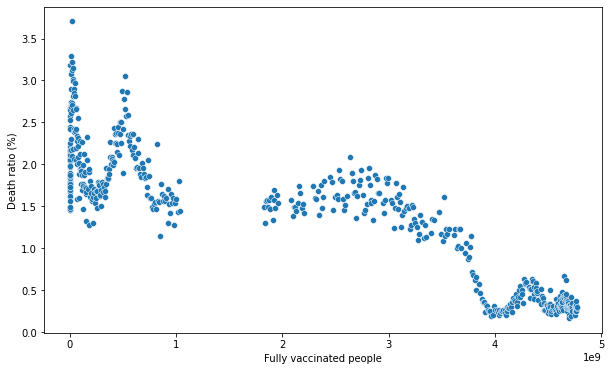

In [21]:
sns.scatterplot(x='people_fully_vaccinated', y='death_ratio', data=df_cases_with_vaccination);
plt.xlabel('Fully vaccinated people')
plt.ylabel('Death ratio (%)')
plt.show()

### Hypothesis Testing

In [22]:
def __perform_test(df, col1, col2, alpha=0.05):
  n, _, diff, var, _, _ = stats.describe(df[col1] - df[col2])

  temp1 = df[col1].to_numpy()
  temp2 = df[col2].to_numpy()
  res = stats.ttest_rel(temp1, temp2)

  means = ws.CompareMeans(ws.DescrStatsW(temp1), ws.DescrStatsW(temp2))
  confint = means.tconfint_diff(alpha=alpha, alternative='two-sided', usevar='unequal')
  degfree = means.dof_satt()

  index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
  return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index=index)

In [23]:
def visualize_test(df, col1, col2, alpha=0.05, title=''):
  fig, ax = plt.subplots(2, 1, figsize=(12, 8))

  mins = min([df[col1].min(), df[col2].min()])
  maxs = max([df[col1].max(), df[col2].max()])

  mean1 = df[col1].mean()
  mean2 = df[col2].mean()

  t_stat = __perform_test(df, col1, col2, alpha)
  pv1 = mean2 + t_stat[4]
  pv2 = mean2 + t_stat[5]

  temp = df[col1].to_numpy()
  ax[1].hist(temp, bins=30, alpha=0.7)
  ax[1].set_xlim([mins, maxs])
  ax[1].axvline(x=mean1, color='red', linewidth=4)
  ax[1].axvline(x=pv1, color='red', linestyle='--', linewidth=4)
  ax[1].axvline(x=pv2, color='red', linestyle='--', linewidth=4)
  ax[1].set_ylabel('Count')
  ax[1].set_xlabel(col1)
  ax[1].axis(xmin=0,xmax=4)

  temp = df[col2].to_numpy()
  ax[0].hist(temp, bins=30, alpha=0.7)
  ax[0].set_xlim([mins, maxs])
  ax[0].axvline(x=mean2, color='red', linewidth=4)
  ax[0].set_ylabel('Count')
  ax[0].set_xlabel(col2)
  ax[0].axis(xmin=0,xmax=4)

  plt.suptitle(title)

  return t_stat

DegFreedom    1.763362e+02
Difference   -1.771185e+00
Statistic    -4.988018e+01
PValue        2.033743e-99
Low95CI      -1.846559e+00
High95CI     -1.695812e+00
dtype: float64


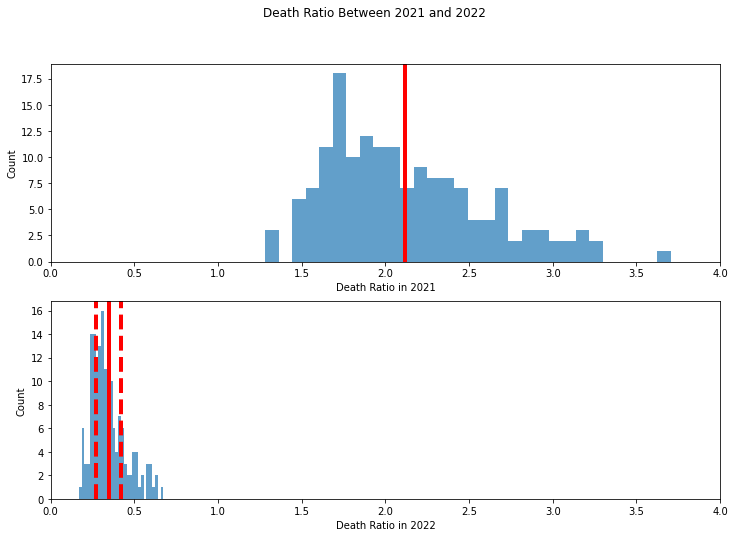

In [24]:
df_death_ratio_2021 = df_cases_with_vaccination[df_cases_with_vaccination['date'].dt.year==2021]['death_ratio'].tolist()
df_death_ratio_2022 = df_cases_with_vaccination[df_cases_with_vaccination['date'].dt.year==2022]['death_ratio'].tolist()

df_death_ratio_2021 = df_death_ratio_2021[:min(len(df_death_ratio_2021), len(df_death_ratio_2022))]
df_death_ratio_2022 = df_death_ratio_2022[:min(len(df_death_ratio_2021), len(df_death_ratio_2022))]
df1 = pd.DataFrame({
    'Death Ratio in 2022': df_death_ratio_2022,
    'Death Ratio in 2021': df_death_ratio_2021
})

results = visualize_test(df1, 'Death Ratio in 2022', 'Death Ratio in 2021', title='Death Ratio Between 2021 and 2022')

print(results)
plt.show()

# Machine Learning

### Train Test Split

In [25]:
x_train, x_test, y_train, y_test = \
    train_test_split(
        df_cases_with_vaccination['people_fully_vaccinated'].values.reshape((-1, 1)),
        df_cases_with_vaccination['death_ratio'],
        test_size=0.3
    )

### Linear Regression

In [26]:
linear_reg = LinearRegression()

linear_reg.fit(x_train, y_train)

y_predict = linear_reg.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
r2 = metrics.r2_score(y_test,y_predict)

print(f'Equation: {linear_reg.coef_[0]} X1 + {linear_reg.intercept_}')
print()
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print()
starting = linear_reg.predict([[0]])[0]
for ending in linear_reg.predict([[df_vaccine_world['population'].max() * 0.1], 
               [df_vaccine_world['population'].max() * 0.25], 
               [df_vaccine_world['population'].max() * 0.5], 
               [df_cases_with_vaccination['people_fully_vaccinated'].max()]]):
  reduction_percentage = (starting - ending) / starting * 100
  print(reduction_percentage)

Equation: -3.7576373953535023e-10 X1 + 2.195116071040547

MAE: 0.29223849114651845
MSE: 0.1257308792283682
RMSE: 0.35458550340978157
R2: 0.8027717359613121

13.48050160288253
33.70125400720633
67.40250801441265
81.66823982504691


### Bagging Regressor

In [27]:
bagging_reg = BaggingRegressor()

bagging_reg.fit(x_train, y_train)

y_predict = bagging_reg.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
r2 = metrics.r2_score(y_test,y_predict)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print()
starting = bagging_reg.predict([[0]])[0]
for ending in bagging_reg.predict([[df_vaccine_world['population'].max() * 0.1], 
               [df_vaccine_world['population'].max() * 0.25], 
               [df_vaccine_world['population'].max() * 0.5], 
               [df_cases_with_vaccination['people_fully_vaccinated'].max()]]):
  reduction_percentage = (starting - ending) / starting * 100
  print(reduction_percentage)

MAE: 0.14474863492988888
MSE: 0.04392153685615574
RMSE: 0.2095746569987787
R2: 0.9311022994413584

7.146143452971934
4.72175864897448
83.82585877738333
81.1251728685711


### Decision Tree Regressor

In [28]:
tree_reg = DecisionTreeRegressor()

tree_reg.fit(x_train, y_train)

y_predict = tree_reg.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
r2 = metrics.r2_score(y_test,y_predict)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print()
starting = tree_reg.predict([[0]])[0]
for ending in tree_reg.predict([[df_vaccine_world['population'].max() * 0.1], 
               [df_vaccine_world['population'].max() * 0.25], 
               [df_vaccine_world['population'].max() * 0.5], 
               [df_cases_with_vaccination['people_fully_vaccinated'].max()]]):
  reduction_percentage = (starting - ending) / starting * 100
  print(reduction_percentage)

MAE: 0.16870843164235666
MSE: 0.058867814697039965
RMSE: 0.24262690431409284
R2: 0.9076567588511006

1.2493414602785422
-3.6426208443400436
82.04592629374234
80.21299175337361


### Random Forest Regressor

In [29]:
forest_reg = RandomForestRegressor()

forest_reg.fit(x_train, y_train)

y_predict = forest_reg.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
r2 = metrics.r2_score(y_test,y_predict)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print()
starting = forest_reg.predict([[0]])[0]
for ending in forest_reg.predict([[df_vaccine_world['population'].max() * 0.1], 
               [df_vaccine_world['population'].max() * 0.25], 
               [df_vaccine_world['population'].max() * 0.5], 
               [df_cases_with_vaccination['people_fully_vaccinated'].max()]]):
  reduction_percentage = (starting - ending) / starting * 100
  print(reduction_percentage)

MAE: 0.13978977403192344
MSE: 0.04150318754847826
RMSE: 0.20372331125445184
R2: 0.9348958530911826

4.777472768230682
0.8758949873187203
83.4049923498422
81.01961191673706


### K Neighbors Regressor

In [30]:
k_neighbors_reg = KNeighborsRegressor(n_neighbors=12)

k_neighbors_reg.fit(x_train, y_train)

y_predict = k_neighbors_reg.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
r2 = metrics.r2_score(y_test,y_predict)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print()
starting = k_neighbors_reg.predict([[0]])[0]
for ending in k_neighbors_reg.predict([[df_vaccine_world['population'].max() * 0.1], 
               [df_vaccine_world['population'].max() * 0.25], 
               [df_vaccine_world['population'].max() * 0.5], 
               [df_cases_with_vaccination['people_fully_vaccinated'].max()]]):
  reduction_percentage = (starting - ending) / starting * 100
  print(reduction_percentage)

MAE: 0.12551588133057584
MSE: 0.033571087392610215
RMSE: 0.18322414522275773
R2: 0.947338574827673

6.773245500668184
13.353897626520364
83.59454118338117
83.11602717468949


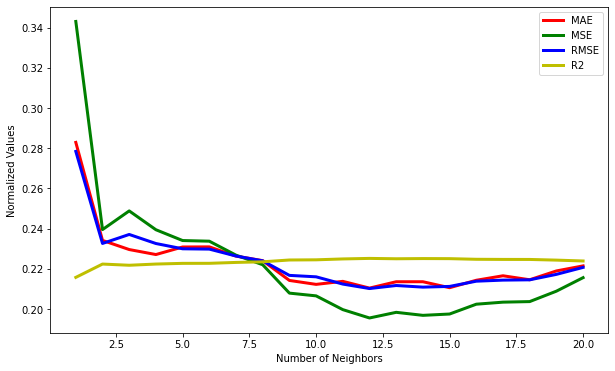

In [31]:
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

for K in range(1,21):
  k_neighbors_reg = KNeighborsRegressor(n_neighbors=K)

  k_neighbors_reg.fit(x_train, y_train)

  y_predict = k_neighbors_reg.predict(x_test)

  mae_list.append(metrics.mean_absolute_error(y_test, y_predict))
  mse_list.append(metrics.mean_squared_error(y_test, y_predict))
  rmse_list.append(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
  r2_list.append(metrics.r2_score(y_test,y_predict))

plt.plot(range(1,21), mae_list/np.linalg.norm(mae_list), 'r', label='MAE', linewidth=3)
plt.plot(range(1,21), mse_list/np.linalg.norm(mse_list), 'g', label='MSE', linewidth=3)
plt.plot(range(1,21), rmse_list/np.linalg.norm(rmse_list), 'b', label='RMSE', linewidth=3)
plt.plot(range(1,21), r2_list/np.linalg.norm(r2_list), 'y', label='R2', linewidth=3)

plt.xlabel('Number of Neighbors')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()

### XGBoost Regressor

In [32]:
xgboost_reg = xgb.XGBRegressor(objective='reg:squarederror')

xgboost_reg.fit(x_train, y_train)

y_predict = xgboost_reg.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
r2 = metrics.r2_score(y_test,y_predict)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print()
starting = xgboost_reg.predict([[0]])[0]
for ending in xgboost_reg.predict([[df_vaccine_world['population'].max() * 0.1], 
               [df_vaccine_world['population'].max() * 0.25], 
               [df_vaccine_world['population'].max() * 0.5], 
               [df_cases_with_vaccination['people_fully_vaccinated'].max()]]):
  reduction_percentage = (starting - ending) / starting * 100
  print(reduction_percentage)

MAE: 0.12946500800838057
MSE: 0.0373741991482989
RMSE: 0.19332407803555898
R2: 0.9413728078329381

-2.9017219319939613
3.560827299952507
81.4160704612732
80.92644214630127


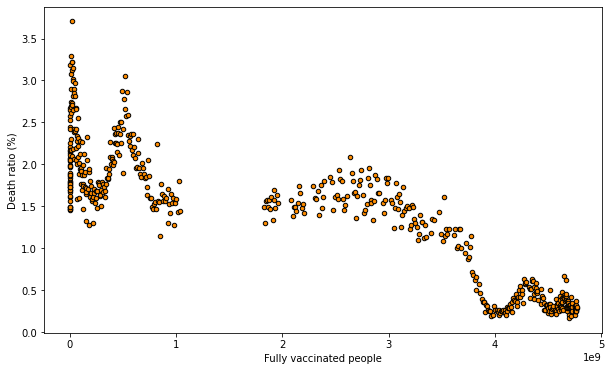

In [33]:
plt.figure()
plt.scatter(df_cases_with_vaccination['people_fully_vaccinated'], df_cases_with_vaccination['death_ratio'], s=20, edgecolor='black', c='darkorange')
plt.xlabel('Fully vaccinated people')
plt.ylabel('Death ratio (%)')
plt.show()

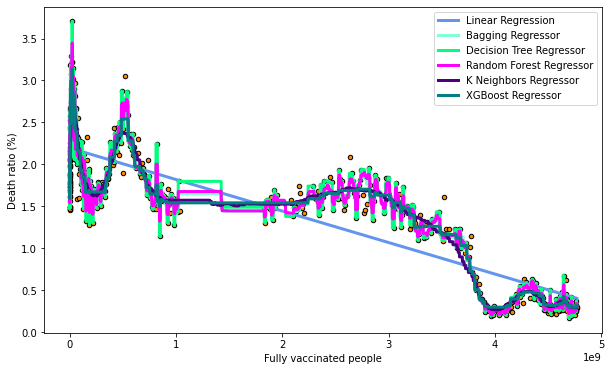

In [34]:
test = np.arange(0.0, df_cases_with_vaccination['people_fully_vaccinated'].max(), 10000)[:, np.newaxis]
linear_y = linear_reg.predict(test)
bagging_y = bagging_reg.predict(test)
tree_y = tree_reg.predict(test)
forest_y = forest_reg.predict(test)
k_neighbors_y = k_neighbors_reg.predict(test)
xgboost_y = xgboost_reg.predict(test)

plt.figure()
plt.scatter(df_cases_with_vaccination['people_fully_vaccinated'], df_cases_with_vaccination['death_ratio'], s=20, edgecolor='black', c='darkorange')
plt.plot(test, linear_y, color='cornflowerblue', label='Linear Regression', linewidth=3)
plt.plot(test, bagging_y, color='aquamarine', label='Bagging Regressor', linewidth=3)
plt.plot(test, tree_y, color='springgreen', label='Decision Tree Regressor', linewidth=3)
plt.plot(test, forest_y, color='fuchsia', label='Random Forest Regressor', linewidth=3)
plt.plot(test, k_neighbors_y, color='indigo', label='K Neighbors Regressor', linewidth=3)
plt.plot(test, xgboost_y, color='teal', label='XGBoost Regressor', linewidth=3)
plt.xlabel('Fully vaccinated people')
plt.ylabel('Death ratio (%)')
plt.legend()
plt.show()